<a href="https://colab.research.google.com/github/sindla97/Causal_inference_twins/blob/main/causalml_pennbonus_exp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Data set on the Pennsylvania Reemployment Bonus experiment

In [1]:
!pip install dowhy
!pip install networkx==3.2
!pip install econml
!pip install DoubleML

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 398.4/398.4 kB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.0/193.0 kB 14.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 37.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 66.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 126.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 56.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 345.3/345.3 kB 22.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.9/232.9 kB 16.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 125.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.3/47.3 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 17.0 MB/s eta 0:00:00
  Attempting uninstall: networkx
    Found existing installation: networkx 3.5
    Uninstalling networkx-3.5:
      Successfully un

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 443.3/443.3 kB 7.7 MB/s eta 0:00:00


In [1]:
import doubleml
from doubleml import datasets

ModuleNotFoundError: No module named 'doubleml'

In [24]:
data=doubleml.datasets.fetch_bonus(return_type='DataFrame', polynomial_features=False)

##Variable description, based on the supplementary material of Chernozhukov et al. (2020):

abdt: chronological time of enrollment of each claimant in the Pennsylvania reemployment bonus experiment.

tg: indicates the treatment group (bonus amount - qualification period) of each claimant.

inuidur1: a measure of length (in weeks) of the first spell of unemployment

inuidur2: a second measure for the length (in weeks) of

female: dummy variable; it indicates if the claimant's sex is female (=1) or male (=0).

black: dummy variable; it indicates a person of black race (=1).

hispanic: dummy variable; it indicates a person of hispanic race (=1).

othrace: dummy variable; it indicates a non-white, non-black, not-hispanic person (=1).

dep1: dummy variable; indicates if the number of dependents of each claimant is equal to 1 (=1).

dep2: dummy variable; indicates if the number of dependents of each claimant is equal to 2 (=1).

q1-q6: six dummy variables indicating the quarter of experiment during which each claimant enrolled.

recall: takes the value of 1 if the claimant answered “yes” when was asked if he/she had any expectation to be recalled

agelt35: takes the value of 1 if the claimant's age is less than 35 and 0 otherwise.

agegt54: takes the value of 1 if the claimant's age is more than 54 and 0 otherwise.

durable: it takes the value of 1 if the occupation of the claimant was in the sector of durable manufacturing and 0 otherwise.

nondurable: it takes the value of 1 if the occupation of the claimant was in the sector of nondurable manufacturing and 0 otherwise.

lusd: it takes the value of 1 if the claimant filed in Coatesville, Reading, or Lancaster and 0 otherwise.

These three sites were considered to be located in areas characterized by low unemployment rate and short duration of unemployment.

husd: it takes the value of 1 if the claimant filed in Lewistown, Pittston, or Scranton and 0 otherwise.

These three sites were considered to be located in areas characterized by high unemployment rate and short duration of unemployment.

muld: it takes the value of 1 if the claimant filed in Philadelphia-North, Philadelphia-Uptown, McKeesport, Erie, or Butler and 0 otherwise.

These three sites were considered to be located in areas characterized by moderate unemployment rate and long duration of unemployment."

In [15]:
print(data.columns.tolist())

['index', 'abdt', 'tg', 'inuidur1', 'inuidur2', 'female', 'black', 'hispanic', 'othrace', 'dep', 'q1', 'q2', 'q3', 'q4', 'q5', 'q6', 'recall', 'agelt35', 'agegt54', 'durable', 'nondurable', 'lusd', 'husd', 'muld', 'dep1', 'dep2']


In [15]:
data.head()

,index,abdt,tg,inuidur1,inuidur2,female,black,hispanic,othrace,dep,...,recall,agelt35,agegt54,durable,nondurable,lusd,husd,muld,dep1,dep2
0,0,10824,0,2.890372,18,0,0,0,0,2,...,0,0,0,0,0,0,1,0,0.0,1.0
1,3,10824,0,0.000000,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0.0,0.0
2,4,10747,0,3.295837,27,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0.0,0.0
3,11,10607,1,2.197225,9,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0.0,0.0
4,12,10831,0,3.295837,27,0,0,0,0,1,...,0,0,1,1,0,1,0,0,1.0,0.0


In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5099 entries, 0 to 5098
Data columns (total 26 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   index       5099 non-null   int64  
 1   abdt        5099 non-null   int64  
 2   tg          5099 non-null   int64  
 3   inuidur1    5099 non-null   float64
 4   inuidur2    5099 non-null   int64  
 5   female      5099 non-null   int64  
 6   black       5099 non-null   int64  
 7   hispanic    5099 non-null   int64  
 8   othrace     5099 non-null   int64  
 9   dep         5099 non-null   int64  
 10  q1          5099 non-null   int64  
 11  q2          5099 non-null   int64  
 12  q3          5099 non-null   int64  
 13  q4          5099 non-null   int64  
 14  q5          5099 non-null   int64  
 15  q6          5099 non-null   int64  
 16  recall      5099 non-null   int64  
 17  agelt35     5099 non-null   int64  
 18  agegt54     5099 non-null   int64  
 19  durable     5099 non-null  

This dataset is based on survey collected on individual who lost their job in Pennsylvania. It was created to study the impact of financial incentives on accelerating reemployment and reducing the duration of unemployment for Unemployment Insurance (UI) recipients in Pennsylvania

## Using CausalModel to estimate Average Treatment effect(ATE)

1.Model

2.Identify

3.Estimate

4.Refute

In [26]:
from dowhy import causal_graph, CausalModel
model=model=CausalModel(data=data,
             treatment='tg',
             outcome='inuidur1',
             common_causes=["female", "black", "othrace", "dep1", "dep2",
    "q2", "q3", "q4", "q5", "q6", "agelt35", "agegt54",
    "durable", "lusd", "husd"])

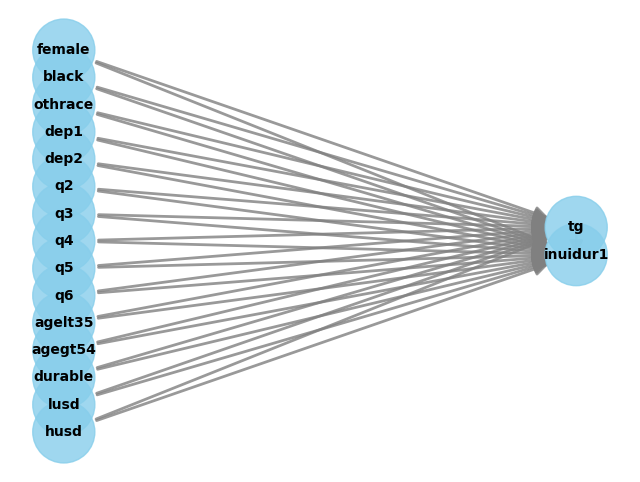

In [7]:
model.view_model()

In [27]:
identified_estimand = model.identify_effect(proceed_when_unidentifiable=True)
print(identified_estimand)

Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
  d                                                                            ↪
─────(E[inuidur1|q4,black,dep2,husd,lusd,q5,agegt54,dep1,q6,durable,othrace,ag ↪
d[tg]                                                                          ↪

↪                     
↪ elt35,q2,q3,female])
↪                     
Estimand assumption 1, Unconfoundedness: If U→{tg} and U→inuidur1 then P(inuidur1|tg,q4,black,dep2,husd,lusd,q5,agegt54,dep1,q6,durable,othrace,agelt35,q2,q3,female,U) = P(inuidur1|tg,q4,black,dep2,husd,lusd,q5,agegt54,dep1,q6,durable,othrace,agelt35,q2,q3,female)

### Estimand : 2
Estimand name: iv
No such variable(s) found!

### Estimand : 3
Estimand name: frontdoor
No such variable(s) found!



In [28]:
causal_estimate = model.estimate_effect(identified_estimand,
        method_name="backdoor.propensity_score_stratification")
print(causal_estimate)

*** Causal Estimate ***

## Identified estimand
Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
  d                                                                            ↪
─────(E[inuidur1|q4,black,dep2,husd,lusd,q5,agegt54,dep1,q6,durable,othrace,ag ↪
d[tg]                                                                          ↪

↪                     
↪ elt35,q2,q3,female])
↪                     
Estimand assumption 1, Unconfoundedness: If U→{tg} and U→inuidur1 then P(inuidur1|tg,q4,black,dep2,husd,lusd,q5,agegt54,dep1,q6,durable,othrace,agelt35,q2,q3,female,U) = P(inuidur1|tg,q4,black,dep2,husd,lusd,q5,agegt54,dep1,q6,durable,othrace,agelt35,q2,q3,female)

## Realized estimand
b: inuidur1~tg+q4+black+dep2+husd+lusd+q5+agegt54+dep1+q6+durable+othrace+agelt35+q2+q3+female
Target units: ate

## Estimate
Mean value: -0.10631984556681584



###Refutation methods:

1."random_common_cause": This menthod checks if a radom common cause of treatment and outcome is added to the model would it different from the estimate efffect.

2."placebo_treatment_refuter": if a treatment variable is replaced with random values would you observe any difference in estimate

In [29]:
res_random=model.refute_estimate(identified_estimand, causal_estimate, method_name="random_common_cause", show_progress_bar=True)
print(res_random)

Refuting Estimates:   0%|          | 0/100 [00:00<?, ?it/s]

Refute: Add a random common cause
Estimated effect:-0.10631984556681584
New effect:-0.10631984556681584
p value:1.0



In [31]:
res_placebo=model.refute_estimate(identified_estimand, causal_estimate,
        method_name="placebo_treatment_refuter", show_progress_bar=True, placebo_type="permute")
print(res_placebo)

Refuting Estimates:   0%|          | 0/100 [00:00<?, ?it/s]

Refute: Use a Placebo Treatment
Estimated effect:-0.10631984556681584
New effect:-0.0007616633024707187
p value:0.96



##Using Graphical Causal Models to estimate ATE & CATE

In [33]:
from dowhy import gcm
# lets get graph from above causal model, you can also construct the graph and provide as input
causal_model=gcm.StructuralCausalModel(graph=model._graph._graph)

In [ ]:
# lets try atuo assigning causal mechanism and allowing it to overide the model (graph) we provided
auto_assignment_summary = gcm.auto.assign_causal_mechanisms(causal_model, data, override_models=True)
print(auto_assignment_summary)


## lets see the top causes effecting the outcome
